In [1]:
import pandas as pd

df = pd.read_csv("all_data.csv", sep=";")

df.head()

,product,Type,product_id,temperature,solubility,fat,protein,salt,sugars,water,fat_water,fat_source,protein_source,salt_source,sugar_source,water_source,solubility_source,variance
0,NaN,NaN,NaN,°C,mol/(kg*Atm),g/100g,g/100g,g/100g,g/100g,g/100g,g/100g,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cheese pressed curd uncooked,Cheese,NaN,15,0.025446429,10,34.5,1.121,0,49.5,59.5,paper,paper,fineli kadett_9_11_fat,fineli kadett_9_11_fat,paper,Acerbi_2015,NaN
2,Cheese pressed curd uncooked,Cheese,NaN,20,0.022321429,10,34.5,1.121,0,49.5,59.5,paper,paper,fineli kadett_9_11_fat,fineli kadett_9_11_fat,paper,Acerbi_2015,NaN
3,Cheese pressed curd uncooked,Cheese,NaN,10,0.027678571,10,34.5,1.121,0,49.5,59.5,paper,paper,fineli kadett_9_11_fat,fineli kadett_9_11_fat,paper,Acerbi_2015,NaN
4,Cheese pressed curd uncooked,Cheese,NaN,0,0.033928571,10,34.5,1.121,0,49.5,59.5,paper,paper,fineli kadett_9_11_fat,fineli kadett_9_11_fat,paper,Acerbi_2015,NaN


### Data Preparation

In [2]:
# Drop
df = df.drop([0]) # Unités

# Convert mol -> mmol
for i in df.index:
    df.loc[i, "solubility"] = "{:.1f}".format(float(df.loc[i, "solubility"])*1e3)
    
# Fill na
df = df.fillna(0)

# Transform to numeric
for att in ["temperature", "solubility", "fat", "protein", "salt", "water"]:
    df[att] = df[att].apply(pd.to_numeric)

In [3]:
# Take mean solubility value when the food composition and temperatures are the same
d_values = dict()
for i in df.index:
    key = tuple(df.loc[i].loc[["Type",
                             "temperature",
                             "fat", "protein", "salt",
                             "water"]].to_list() )
    
    if key not in d_values:
        d_values[key] = {"values":list(), "index":list()}
    
    d_values[key]["values"].append( df.loc[i, "solubility"] )
    d_values[key]["index"].append( i )

for key in d_values:
    if len(d_values[key]["index"]) > 1:
        
        mean = sum(d_values[key]["values"])/len(d_values[key]["values"])
        df = df.drop(d_values[key]["index"][1:])
        df.loc[ d_values[key]["index"][0], "solubility" ] = mean

## 1. Food Cartography

In [4]:
df = df[["Type", "temperature", "solubility", "fat", "protein", "salt", "water"]]

df.head()

,Type,temperature,solubility,fat,protein,salt,water
1,Cheese,15.0,25.4,10.0,34.5,1.121,49.5
2,Cheese,20.0,22.3,10.0,34.5,1.121,49.5
3,Cheese,10.0,27.7,10.0,34.5,1.121,49.5
4,Cheese,0.0,33.9,10.0,34.5,1.121,49.5
5,Cheese,5.0,29.0,10.0,34.5,1.121,49.5


### 1.1. Subplots
We represent all food products.

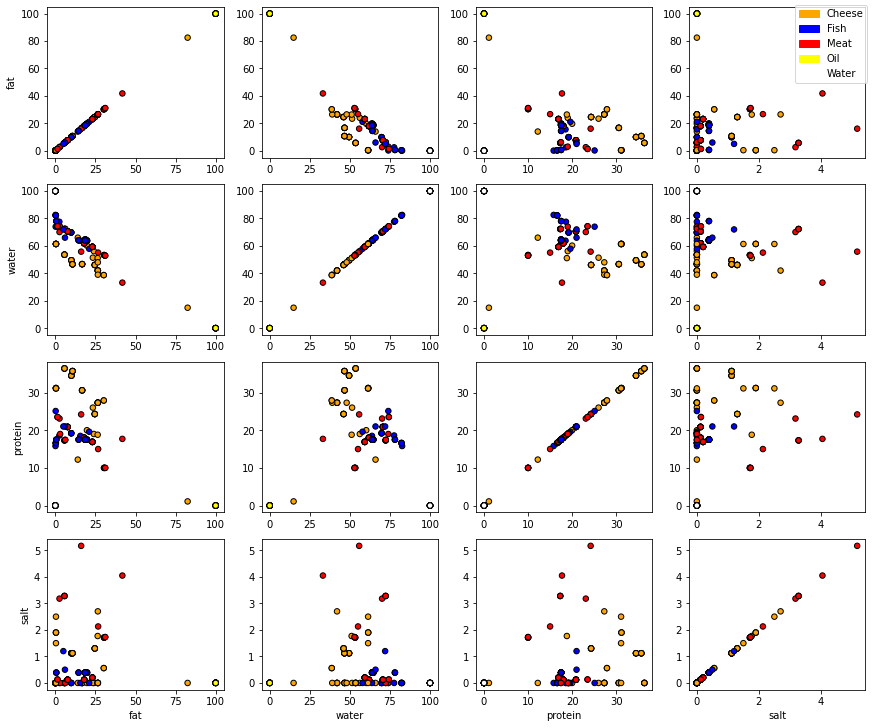

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

fig1, f1_axes = plt.subplots(ncols=4, nrows=4, constrained_layout=True)
fig1.set_size_inches(12, 10)

nut = ["fat","water","protein","salt"]

# Colors
d_color = {'Cheese':'orange', 'Fish': 'blue', 'Meat': 'red', 'Oil': 'yellow', 'Water':'white'}
colors = [ d_color[t] for t in df["Type"] ]

for i in range(len(f1_axes)):
    x_ax = f1_axes[i]
    for j in range(len(x_ax)):
        xy_ax = x_ax[j]
        
        nut_x = nut[ j ]
        nut_y = nut[ i ]
        
        xy_ax.scatter(df[[nut_x]], df[[nut_y]], c = colors, edgecolors = 'black', s = 30)
        
        if i == 3:
            xy_ax.set_xlabel(nut_x)
        
        if j == 0:
            xy_ax.set_ylabel(nut_y)

handles = []
for nut_c in d_color:
    handles.append( mpatches.Patch(color=d_color[nut_c], label=nut_c) )

fig1.legend(handles=handles, loc = 'upper right')

fig1.savefig("food_mapping.png")